# seaborn - 빈도 그래프 2

데이터의 빈도를 표현하는 다른 방법들

statsmodels 패키지의 설치가 필요(pip install statsmodels)

## #01. 작업준비

### 1. 패키지 참조

In [90]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
from statsmodels.graphics.mosaicplot import mosaic

### 2. 데이터 가져오기

In [91]:
titanic = read_excel(
    "https://data.hossam.kr/D01/titanic.xlsx"
)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [92]:
# 데이터 확인 후 index 설정, category 전처리
titanic = read_excel("https://data.hossam.kr/D01/titanic.xlsx", index_col="PassengerId")

df = titanic.astype({"Survived": "category", "Pclass": "category", "Sex": "category", 
                     "Cabin": "category", "Embarked": "category"})

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. 그래프 전역 설정

In [93]:
plt.rcParams['font.family']="Malgun Gothic"
plt.rcParams['font.size']=10
plt.rcParams['figure.figsize']=(7,4)
plt.rcParams['axes.unicode_minus']=False

## #02. Countplot

데이터의 빈도를 표현하는 가장 간편한 방법

`catplot()`에서 `kind값`이 `count`로 고정되어 있는 형태

### 1. x축에 설정된 `집단별 빈도수 확인`

In [94]:
df.dtypes

Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin       category
Embarked    category
dtype: object

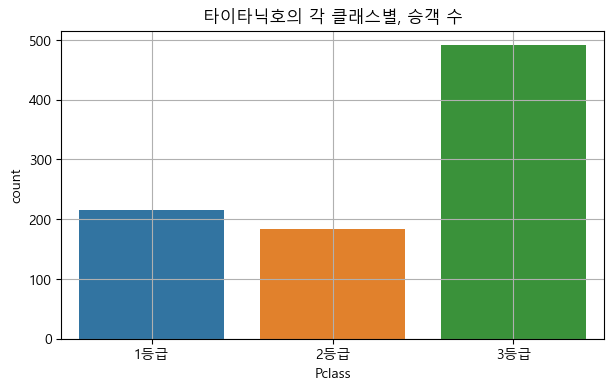

In [95]:
sb.countplot(data=df, x="Pclass")
plt.title("타이타닉호의 각 클래스별, 승객 수")
# 좌표 값 설정 : 좌표는 0부터 시작 (다음 코드 블럭과 비교)
plt.xticks([0, 1, 2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()
plt.close()

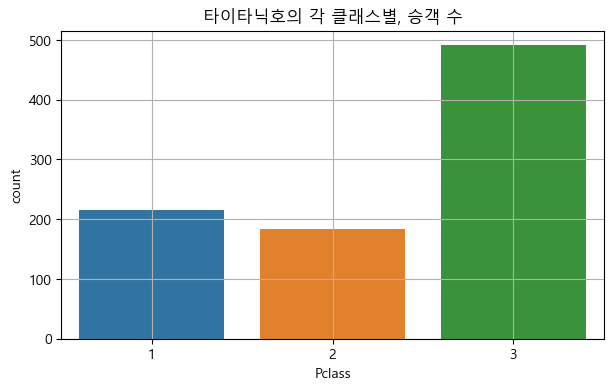

In [96]:
sb.countplot(data=df, x="Pclass")
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.grid()
plt.show()
plt.close()

### 2. 범주 추가

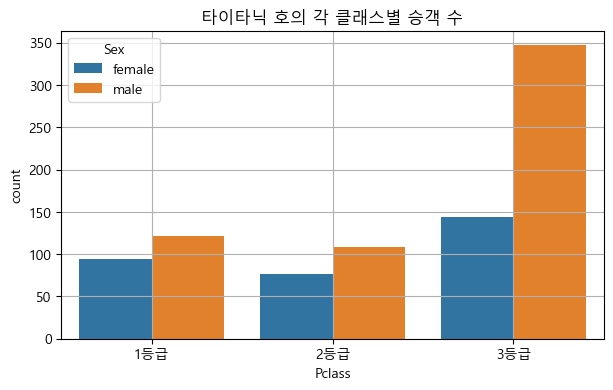

In [97]:
sb.countplot(data=df,
             x="Pclass",
             hue="Sex"  #데이터 구분 기준(범주)
             )
plt.title("타이타닉 호의 각 클래스별 승객 수")
plt.xticks([0,1,2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()
plt.close()

## #03. 모자이크 그래프

막대그래프 외에도 `변량이 모두 범주형인 다차원 데이터를 시각화`할 때는 모자이크 그래프(mosaic plot)를 사용하기도 함

모자이크 그래프는 `그룹 내의 데이터 백분율`을 보여주는 `누적 막대그래프`

모자이크 그래프는 `변수가 3개 이상일 때도 사용` 가능

모자이크 그래프는 `statsmodels.graphics.mosaicplot 패키지의 mosaic 함수를 이용`해서 생성

### 1. 한가지 변수에 대한 비율 표시

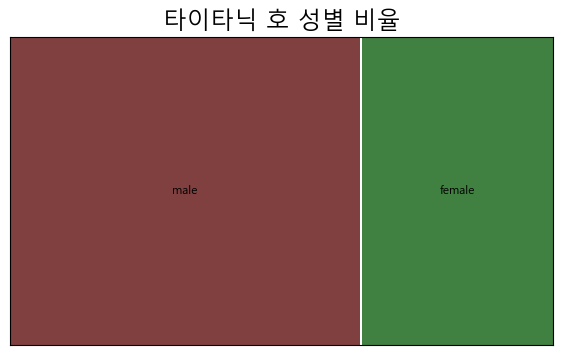

In [98]:
mosaic(df,["Sex"], axes_label=False)

plt.title("타이타닉 호 성별 비율", fontsize=17)
plt.show()
plt.close()
# 아래 코드 블럭과 비교
# axes_label=False을 하는 이유는 변수가 많아질 수록
# 지저분해지기 때문

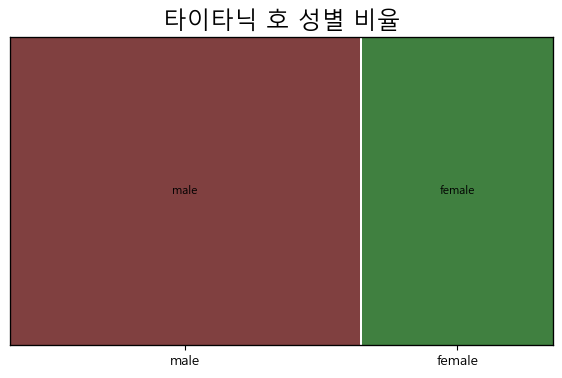

In [99]:
# plt.rcParams["figure.figsize"]=(3,2)
mosaic(df,["Sex"])

plt.title("타이타닉 호 성별 비율", fontsize=17)
plt.show()
plt.close()

### 2. 두 개 이상 범주에 대한 비율 표시

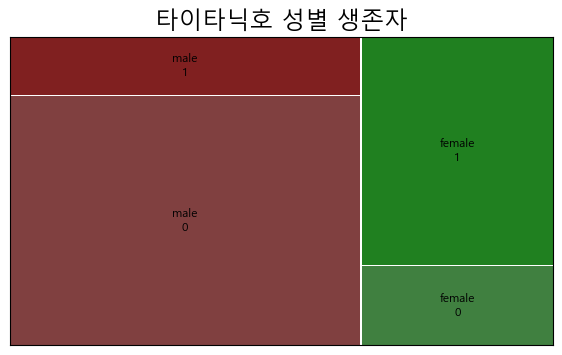

In [100]:
mosaic(df, ['Sex', 'Survived'], axes_label=False)

plt.title('타이타닉호 성별 생존자', fontsize=17)
plt.show()
plt.close()

### 3. 색상과 표시 라벨 변경

In [101]:
def getColor(key):
    print(key)  #입력 값 알아보기
    if '1' in key:
        color='teal'
    else:
        color='lightgray'
    return{"color":color}

In [102]:
def getLabel(key):
    # 성별
    if "male" in key:
        sex="남자"
    else:
        sex="여자"
    
    # 사망/생존
    if "0" in key:
        sur="사망"
    else:
        sur="생존"
    
    label="%s %s" % (sex, sur)
    print(key, "->", label)
    return label


('male', '0')
('male', '0') -> 남자 사망
('male', '1')
('male', '1') -> 남자 생존
('female', '0')
('female', '0') -> 여자 사망
('female', '1')
('female', '1') -> 여자 생존


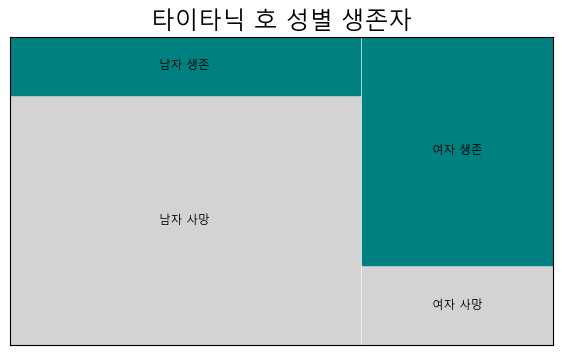

In [103]:
mosaic(df, ["Sex", "Survived"], axes_label=False,
       properties=getColor, labelizer=getLabel)

plt.title("타이타닉 호 성별 생존자", fontsize=17)
plt.show()
plt.close()

람다식 사용

lambda 파라미터이름: 리턴값

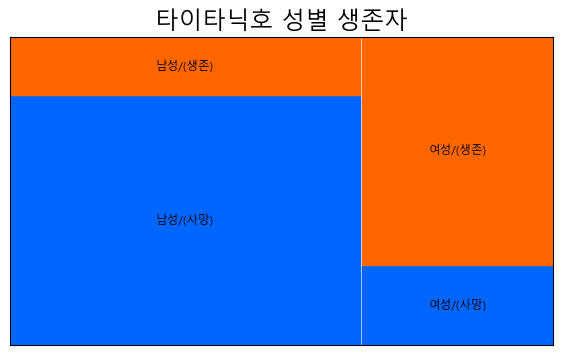

In [104]:
mosaic(df,
       ["Sex", "Survived"], axes_label=False,
       properties=lambda key:{"color":"#ff6600" if "1" in key else '#0066ff'},
       labelizer=lambda key:{("female","1"):"여성/(생존)",
                             ("female","0"):"여성/(사망)",
                             ("male","1"):"남성/(생존)",
                             ("male","0"):"남성/(사망)"}[key])

plt.title('타이타닉호 성별 생존자', fontsize=17)
plt.show()
plt.close()

## #04. 집단별 산점도 그래프

In [105]:
plt.rcParams["font.size"] = 16  #글자크기 설정
plt.rcParams["figure.figsize"] = (20, 10)   #그래프 크기(가로,세로)inch

In [106]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


연령대, 티켓 요금에 따른 생존여부

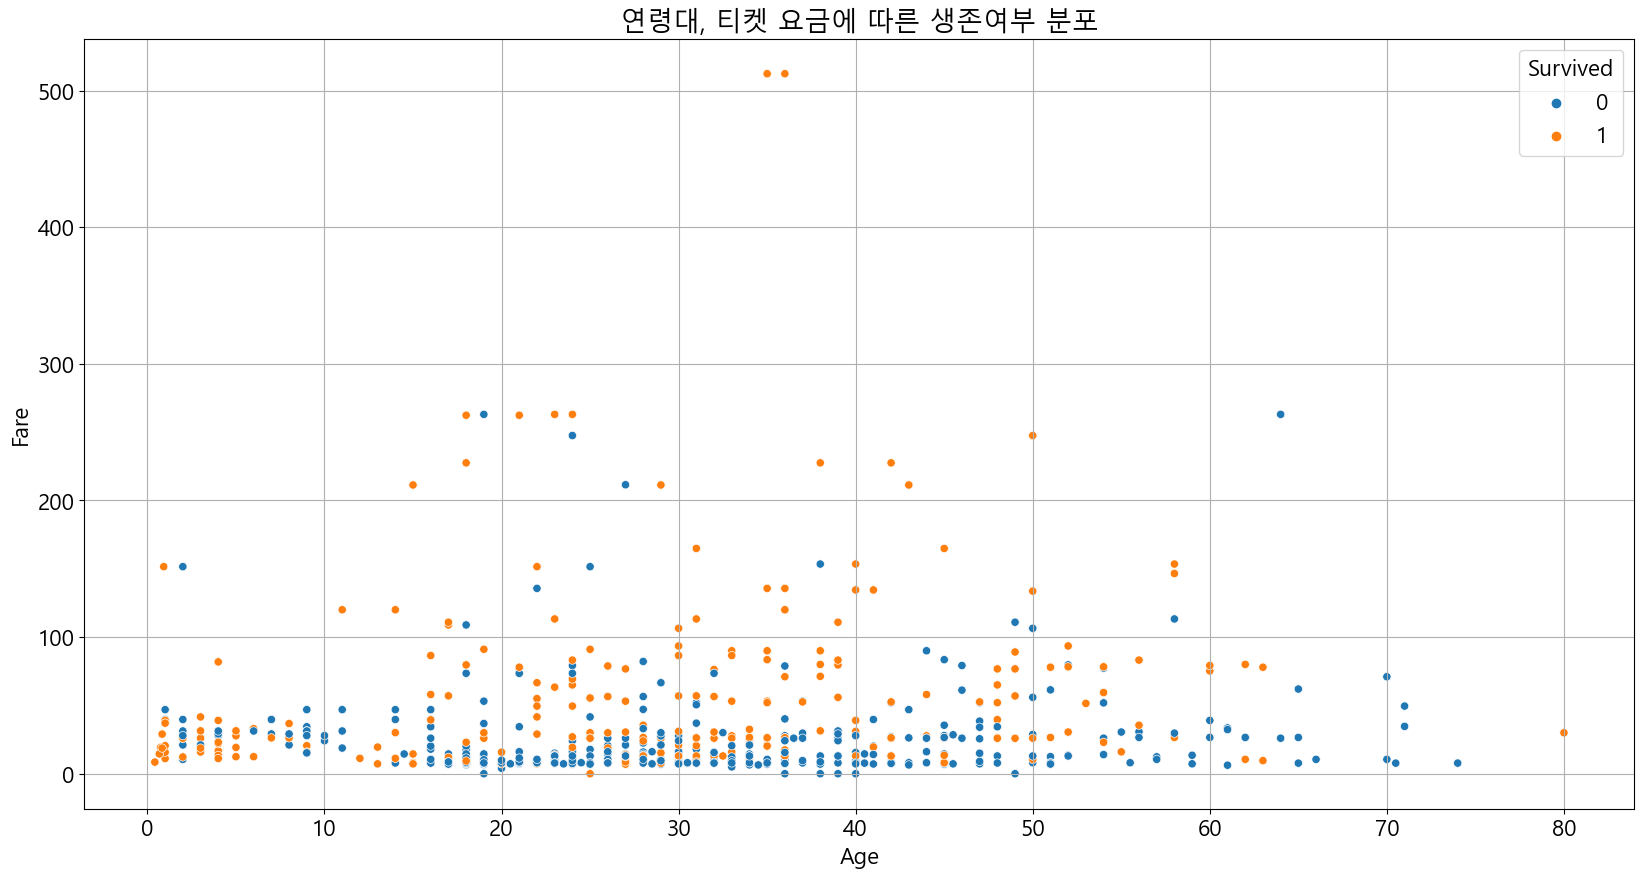

In [107]:
sb.scatterplot(data=df,
               x='Age', y='Fare', hue='Survived')
plt.title("연령대, 티켓 요금에 따른 생존여부 분포")
plt.grid()
plt.show()

연령대, 티켓 요금에 따른 생존여부에 성별 데이터 추가

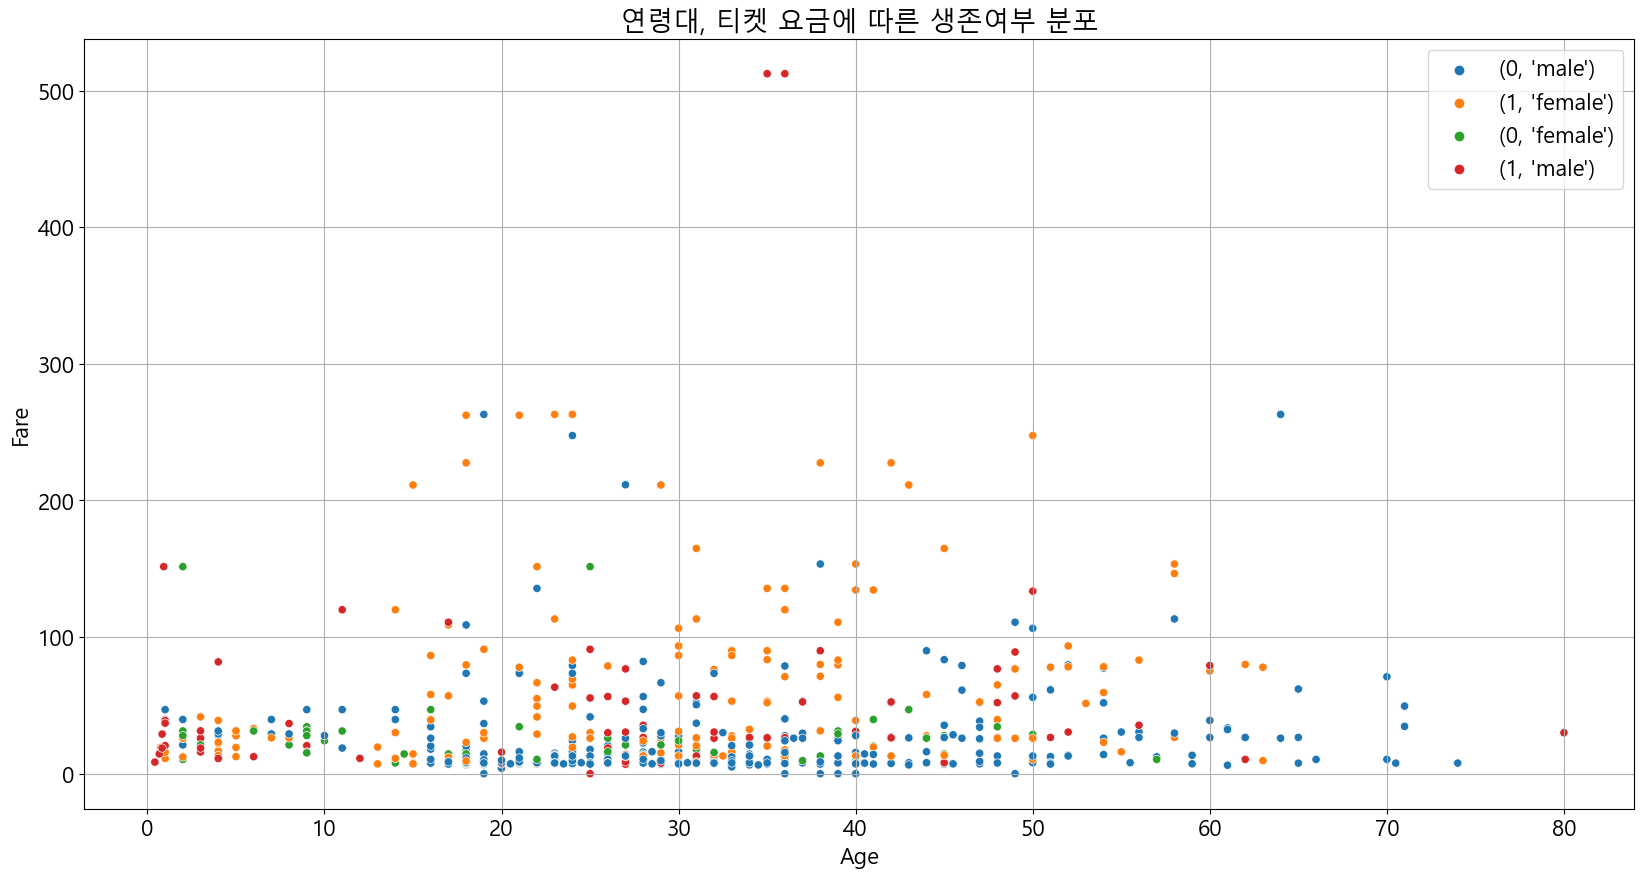

In [108]:
sb.scatterplot(data=df, 
               x='Age', y='Fare', 
               hue=df[['Survived', 'Sex']].apply(tuple, axis=1))
plt.title("연령대, 티켓 요금에 따른 생존여부 분포")
plt.grid()
plt.show()

## #05. 산점도 행렬

각 변수를 교차로 산점도 그래프를 나열한 형태

범주형 데이터는 자동으로 제외

왼쪽 상단에서 오른쪽 하단으로의 중앙에는 각 데이터의 히스토그램이 표시

`diag_kind='kde'` 파라미터를 추가하면 히스토그램 대신 커널밀도추정곡선을 표시

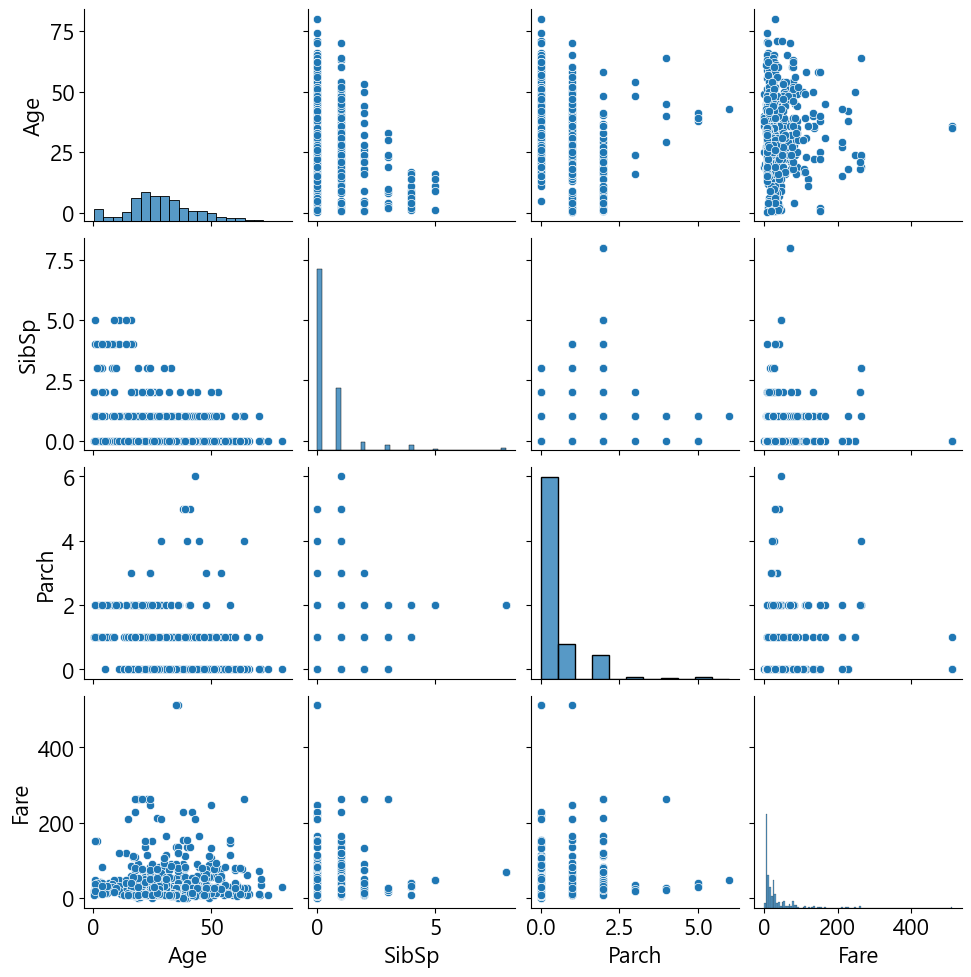

In [109]:
sb.pairplot(df)
plt.show()
plt.close()